<a href="https://colab.research.google.com/github/Tanu-N-Prabhu/Python/blob/master/Machine%20Learning/05_projects/Handwritten%20Digit%20Recognition%20(MNIST)/handwritten_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handwritten Digit Recognition - Step-by-Step Explanation

## Dataset Overview

* **Name**: MNIST Handwritten Digit Dataset
* **Format**: CSV (Comma-Separated Values)
* **Source**: [Kaggle - MNIST in CSV](https://www.kaggle.com/datasets/oddrationale/mnist-in-csv)
* **License**: Open Data, free to use for educational purposes

## Files Included

* `mnist_train.csv` → Contains 60,000 training images
* `mnist_test.csv` → Contains 10,000 test images

Each image is originally a 28×28 grayscale pixel grid but is flattened into a row of 784 columns:

* `pixel0`, `pixel1`, ..., `pixel783`: intensity values from 0 (white) to 255 (black)

* `label`: the true digit class (0 to 9) for the image

## MNIST CSV dataset format

### Sample Row for Label `1` (Digit “1”)

The dataset rows look like this:

```
label,pixel0,pixel1,pixel2,...,pixel783
1,0,0,0,...,0
```

This is what it represents:

* `label = 1` → the image is the digit "1"

* `pixel0` to `pixel783` → represent the flattened 28×28 grayscale pixel values

    * Values range from `0` (white) to `255` (black)

    * So for a digit “1”, you might see pixels activated (non-zero values) mostly in the center vertical stroke, and most others are near 0


#### Simulated Example Row (Truncated)

```
label,pixel0,pixel1,...,pixel350,...,pixel390,...,pixel783
1,0,0,...,128,...,255,...,0
```

Here’s a visual idea:

* Pixels near `pixel350–390` (center columns) might have high values

* All others may be near 0 (white)

#### What It Looks Like Visually
When reshaped back into 28×28, a digit 1 appears mostly like a vertical line in the center:

```
0000000000000000000000000000
0000000001111000000000000000
0000000001111000000000000000
0000000001111000000000000000
...
```

#### How to See It in Your Notebook
If you want to view the actual image of a row with label 1:

```python
# Find the first image with label 1
index_of_1 = train_df[train_df['label'] == 1].index[0]

# Display the image
plt.imshow(X_train.iloc[index_of_1].values.reshape(28, 28), cmap="gray")
plt.title("Label: 1")
plt.axis("off")
plt.show()
```

This will reconstruct the pixel row into an actual 2D digit!


## Step 1: Import Libraries






In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

What’s happening:

* We import Python libraries we’ll need:
* `pandas` & `numpy`: for data handling
* `matplotlib` & `seaborn`: for visualization
* `sklearn`: for machine learning

## Step 2: Load the Dataset

In [3]:
from google.colab import files

train_df = pd.read_csv("/content/mnist_train.csv")
test_df = pd.read_csv("/content/mnist_test.csv")
train_df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
test_df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


What’s happening:

* You upload two CSV files: one for training and one for testing.
* Each row is an image of a handwritten digit (flattened to 784 pixels).
* The `label` column tells us what digit (0-9) the image shows.


## Step 3: Preprocessing the Data

In [5]:
X_train = train_df.drop("label", axis=1)
y_train = train_df["label"]
X_test = test_df.drop("label", axis=1)
y_test = test_df["label"]

X_train = X_train / 255.0
X_test = X_test / 255.0

What’s happening:

* We split the data into features (`X`) and labels (`y`).
* Each image is `28×28 pixels` = 784 features.
* We normalize the pixel values to a range of 0 to 1. This helps the model learn better.


## Step 4: Visualize Sample Digits

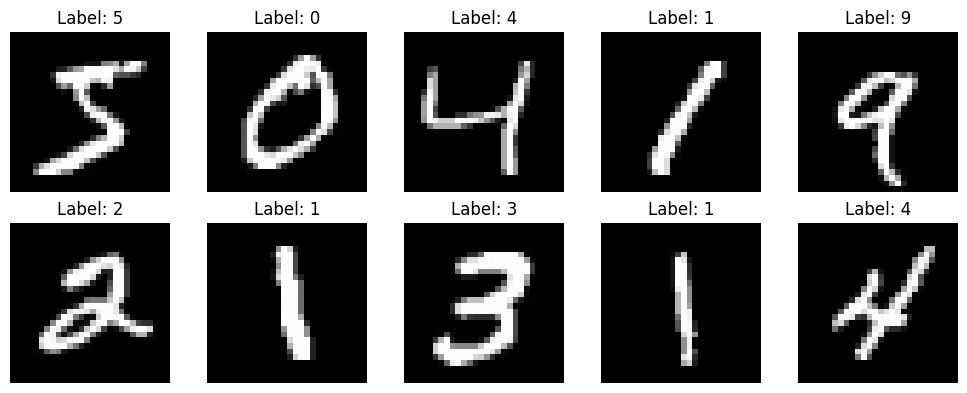

In [6]:
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    img = X_train.iloc[i].values.reshape(28, 28)
    plt.imshow(img, cmap="gray")
    plt.title(f"Label: {y_train.iloc[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

What’s happening:

* We show the first 10 images in the dataset.
* Each image is reshaped from 784 values back to 28×28.
* This helps us see what the data looks like before training.

## Step 5: Train the Machine Learning Model

In [7]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

What’s happening:

* We use a Random Forest, which is made of many decision trees.
* It learns from the training images and labels to find patterns in the pixel values.

## Step 6: Evaluate the Model

In [8]:
y_pred = model.predict(X_test)
print("Test Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print(classification_report(y_test, y_pred))

Test Accuracy: 0.9688
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.96      0.96       892
           6       0.98      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



What’s happening:

* We test the model using the `mnist_test.csv` data.
* `accuracy_score`: how many predictions were correct.
* `classification_report`: tells us how well the model performs for each digit.


## Step 7: Show the Confusion Matrix

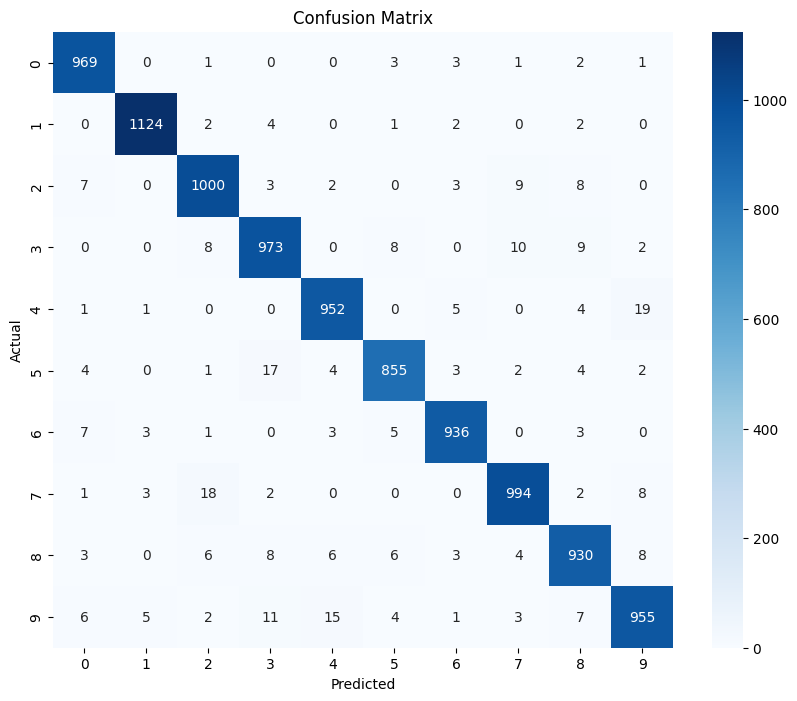

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

What’s happening:

* The confusion matrix shows where the model made mistakes.
* If the prediction matches the label, it appears on the diagonal.
* Off-diagonal values show misclassified digits.

## Step 8: Predict a Single Digit

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


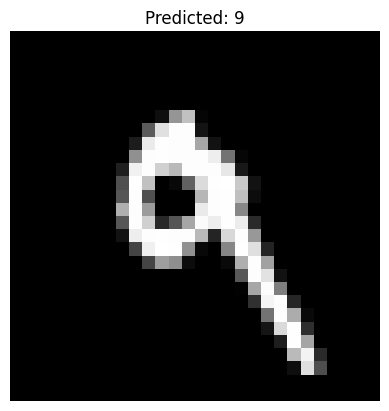

In [11]:
def predict_digit(index):
    img = X_test.iloc[index].values.reshape(1, -1)
    prediction = model.predict(img)[0]
    plt.imshow(X_test.iloc[index].values.reshape(28,28), cmap="gray")
    plt.title(f"Predicted: {prediction}")
    plt.axis("off")
    plt.show()

predict_digit(7)

What’s happening:

* This function lets you predict a single digit by index from the test set.
* You can see the image and its predicted label.
* Try changing the index (e.g., `predict_digit(7)`) to test others.


## Summary


| Step | What We Did                              |
| ---- | ---------------------------------------- |
| 1    | Loaded Python libraries                  |
| 2    | Uploaded and read MNIST dataset (CSV)    |
| 3    | Normalized pixel values to range \[0, 1] |
| 4    | Visualized example digits                |
| 5    | Trained a Random Forest model            |
| 6    | Evaluated it using accuracy and report   |
| 7    | Visualized confusion matrix              |
| 8    | Predicted and displayed a single digit   |
